In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn

In [2]:
# link to dataset --> https://www.kaggle.com/code/anubhavkumargupta/customer-churn-classification-machine-learning
df = pd.read_csv("Churn_Modelling.csv")
df.head(7)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df['CustomerId'].count()

10000

In [5]:
df1 = df.drop(['Surname','Geography','Gender','RowNumber', 'CustomerId'], axis = 1)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


In [7]:
df1.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
tenure_churn_no = df1[df1.Exited == 0]
tenure_churn_yes = df1[df1.Exited == 1]

In [9]:
tenure_churn_no.sample(7)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3269,664,33,7,97286.16,2,1,0,143433.33,0
7978,608,30,2,91057.37,2,1,0,132973.17,0
3945,657,40,10,0.00,2,1,1,52990.70,0
4660,537,41,0,0.00,2,0,1,175262.49,0
1905,535,20,9,134874.40,1,1,1,118825.56,0
7552,636,76,9,126534.60,1,1,1,39789.62,0
95,515,35,10,176273.95,1,0,1,121277.78,0


In [10]:
tenure_churn_yes.sample(7)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4332,507,31,2,134237.07,1,1,1,166423.66,1
1847,590,37,0,64345.21,1,0,1,61759.33,1
7909,620,61,5,0.00,1,0,0,31641.52,1
4941,640,43,9,172478.15,1,1,0,191084.40,1
9560,686,41,5,128876.71,3,1,1,106939.34,1
4889,691,41,8,109153.96,3,1,1,148848.76,1
3724,772,51,9,143930.92,1,0,1,46675.51,1


In [11]:
tenure_churn_yes.shape

(2037, 9)

In [12]:
tenure_churn_no.shape

(7963, 9)

In [13]:
# df2 = pd.concat([tenure_churn_no, tenure_churn_yes],axis=0)#row wise
# df2.head(5)
# df2.tail(5)

In [14]:
tenure_churn_no = df1[df1.Exited == 0].Tenure
tenure_churn_yes = df1[df1.Exited == 1].Tenure

In [15]:
df1['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

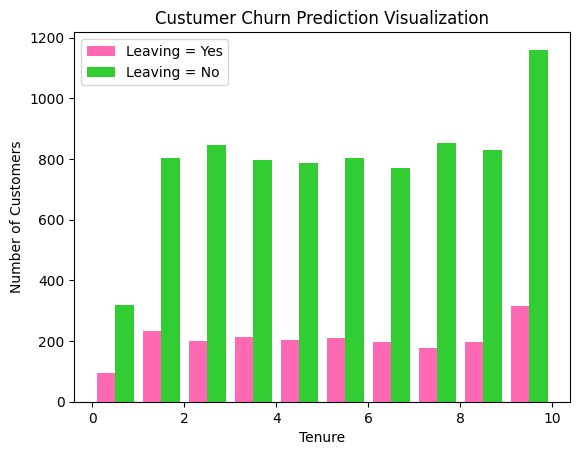

In [16]:
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title('Custumer Churn Prediction Visualization')


plt.hist([tenure_churn_yes, tenure_churn_no],color=['hotpink','limegreen'], label = ['Leaving = Yes','Leaving = No'])
                                                                                
plt.legend()

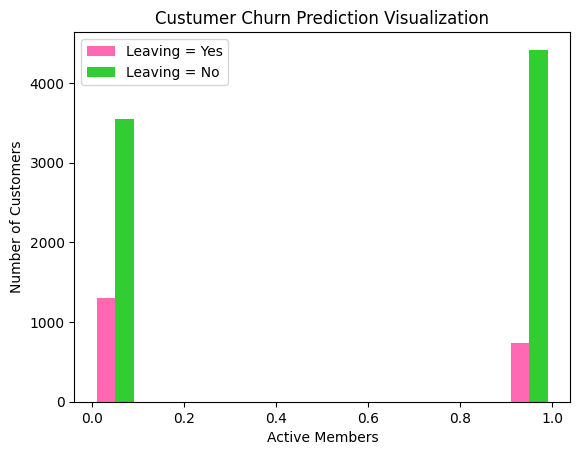

In [17]:
tenure_churn_no = df1[df1.Exited == 0].IsActiveMember
tenure_churn_yes = df1[df1.Exited == 1].IsActiveMember

plt.xlabel("Active Members")
plt.ylabel("Number of Customers")
plt.title('Custumer Churn Prediction Visualization')


plt.hist([tenure_churn_yes, tenure_churn_no],color=['hotpink','limegreen'], label = ['Leaving = Yes','Leaving = No'])
                                                                                
plt.legend()

In [18]:
df1.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
cols_to_scale = ['CreditScore','Tenure','Balance','Age','EstimatedSalary','NumOfProducts','NumOfProducts'] 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [20]:
df1.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2777,0.816,0.581081,0.8,0.499793,0.000000,1,0,0.910950,1
1613,0.778,0.148649,0.3,0.236694,0.333333,1,1,0.527662,0
5805,0.374,0.270270,0.1,0.386368,0.000000,1,1,0.513026,0


In [21]:
X = df1.drop('Exited', axis = 1)
Y = df1['Exited']

In [22]:
print(X)

      CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0           0.538  0.324324     0.2  0.000000       0.000000          1   
1           0.516  0.310811     0.1  0.334031       0.000000          0   
2           0.304  0.324324     0.8  0.636357       0.666667          1   
3           0.698  0.283784     0.1  0.000000       0.333333          0   
4           1.000  0.337838     0.2  0.500246       0.000000          1   
...           ...       ...     ...       ...            ...        ...   
9995        0.842  0.283784     0.5  0.000000       0.333333          1   
9996        0.332  0.229730     1.0  0.228657       0.000000          1   
9997        0.718  0.243243     0.7  0.000000       0.000000          0   
9998        0.844  0.324324     0.3  0.299226       0.333333          1   
9999        0.884  0.135135     0.4  0.518708       0.000000          1   

      IsActiveMember  EstimatedSalary  
0                  1         0.506735  
1                  

In [23]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5)

In [25]:
X_train.shape

(8000, 8)

In [26]:
X_test.shape

(2000, 8)

In [27]:
X_train[:10]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7751,0.800,0.283784,0.6,0.000000,0.333333,0,0,0.096273
4154,0.752,0.216216,0.3,0.000000,0.333333,1,0,0.981478
3881,0.476,0.621622,0.3,0.000000,0.000000,1,1,0.948551
9238,0.846,0.432432,0.4,0.000000,0.333333,1,0,0.646869
5210,0.402,0.229730,0.7,0.517012,0.333333,0,0,0.434670
7487,0.602,0.513514,0.4,0.000000,0.000000,0,0,0.421898
7542,0.314,0.216216,0.4,0.000000,0.333333,1,1,0.303413
7524,0.620,0.297297,0.8,0.666330,0.000000,1,1,0.925815
9412,0.750,0.108108,0.6,0.393324,0.000000,0,0,0.668609
6377,0.684,0.202703,0.9,0.000000,0.000000,1,0,0.567526


In [28]:
len(X_train.columns)

8

In [29]:
model = keras.Sequential([
    keras.layers.Dense(30, input_shape = (8,), activation = 'relu'),
    #keras.layers.Dense(15,activatiion = 'relu' ),
    keras.layers.Dense(1,activation = 'sigmoid' ),
    ])

model.compile(optimizer = 'adam',
             loss ='binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train,Y_train, epochs = 30)

Epoch 1/30
250/250 [==============================] - 1s 2ms/step - loss: 0.5095 - accuracy: 0.7935
Epoch 2/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7960
Epoch 3/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7962
Epoch 4/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.8008
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8080
Epoch 6/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8108
Epoch 7/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.8116
Epoch 8/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8144
Epoch 9/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8194
Epoch 10/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8216

In [30]:
model.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8500


[0.3763452470302582, 0.8500000238418579]

In [31]:
Y_pred = model.predict(X_test)


63/63 [==============================] - 0s 1ms/step
